In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# Load in data
mobility = pd.read_csv("../data/mobility.csv", sep=';')
measures = pd.read_csv("../data/measures_database.csv", sep=';')
stock_it = pd.read_csv("../data/FTSE_MIB_small.csv", sep='\t', encoding='utf7')
# economy = pd.read_csv("data/WEO_Data.csv", sep='\t')


In [13]:
## Look at Data
# mobility.head()
# measures.head()
# df.head()
# economy.head()
# stock_it.head()

In [14]:
# df_reduced = df.dropna(axis='columns', how='all')
# df_reduced = df_reduced[df_reduced['sub_region_1'].isna()]
# columns_to_drop = ['ADMIN_LEVEL_NAME', 
#                    'Alternative source', 
#                    'LINK',
#                    'ID',
#                    'LOG_TYPE',
#                    'country_region',
#                    'country_region_code',
#                    'ENTRY_DATE',
# #                    'Number of Records',
#                    'SOURCE',
#                    'SOURCE_TYPE',
#                    'NON_COMPLIANCE',
#                    'TARGETED_POP_GROUP',
#                    'COMMENTS',
#                    'sub_region_1'
#                   ]
# df_reduced.drop(columns=columns_to_drop, inplace=True)

# df_reduced.sort_values(by='date',ascending=True, inplace=True)

In [15]:
mobility = mobility[mobility['sub_region_1'].isna()]
mobility.drop(['sub_region_1','sub_region_2'], axis='columns', inplace=True)

In [16]:
mobility = mobility.dropna(axis='columns', how='all')
mobility['date'] = pd.to_datetime(mobility['date'], dayfirst=True)

measures = measures.dropna(axis='rows', subset=['DATE_IMPLEMENTED'])
measures = measures.dropna(axis='columns', how='all')
measures['DATE_IMPLEMENTED'] = pd.to_datetime(measures['DATE_IMPLEMENTED'], dayfirst=True)

measures = measures[measures['LOG_TYPE'] != "Phase-out measure"] #Not looking at phase-out atm, only introduction

# economy.dropna(axis='columns', how='all', inplace=True)

In [17]:
country_name = 'Netherlands'
measures_nl = measures[measures['COUNTRY'] == country_name]
mobility_nl = mobility[mobility['country_region'] == country_name]
# economy_nl = economy[economy['Country'] == country_name]

mobility_nl.reset_index(inplace=True)
measures_nl.reset_index(inplace=True)


In [18]:
country_name = 'Germany'
measures_de = measures[measures['COUNTRY'] == country_name]
mobility_de = mobility[mobility['country_region'] == country_name]
# economy_de = economy[economy['Country'] == country_name]

mobility_de.reset_index(inplace=True)
measures_de.reset_index(inplace=True)

In [19]:
country_name = 'Italy'
measures_it = measures[measures['COUNTRY'] == country_name]
mobility_it = mobility[mobility['country_region'] == country_name]
# economy_it = economy[economy['Country'] == country_name]

mobility_it.reset_index(inplace=True)
measures_it.reset_index(inplace=True)

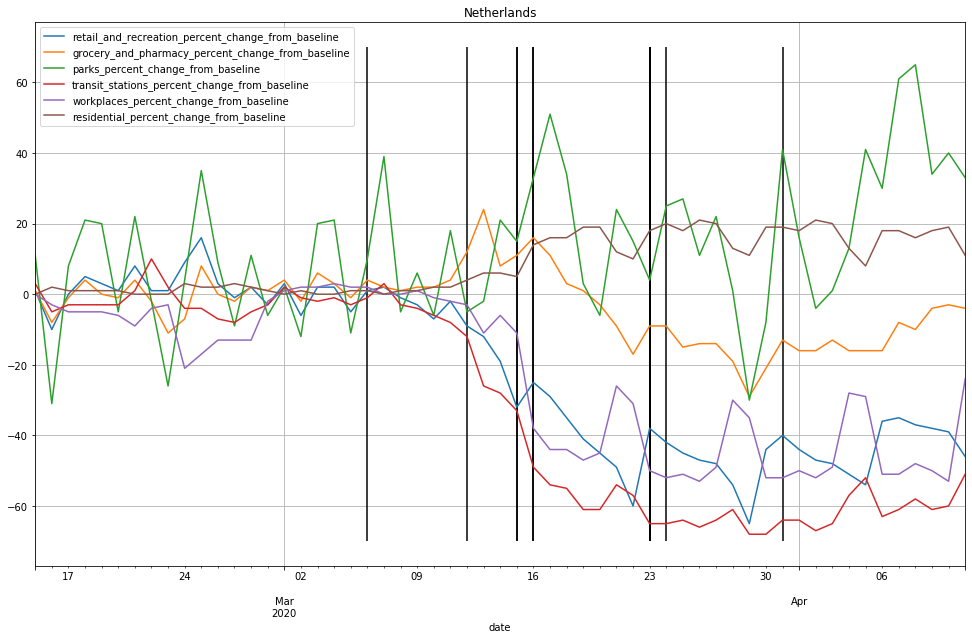

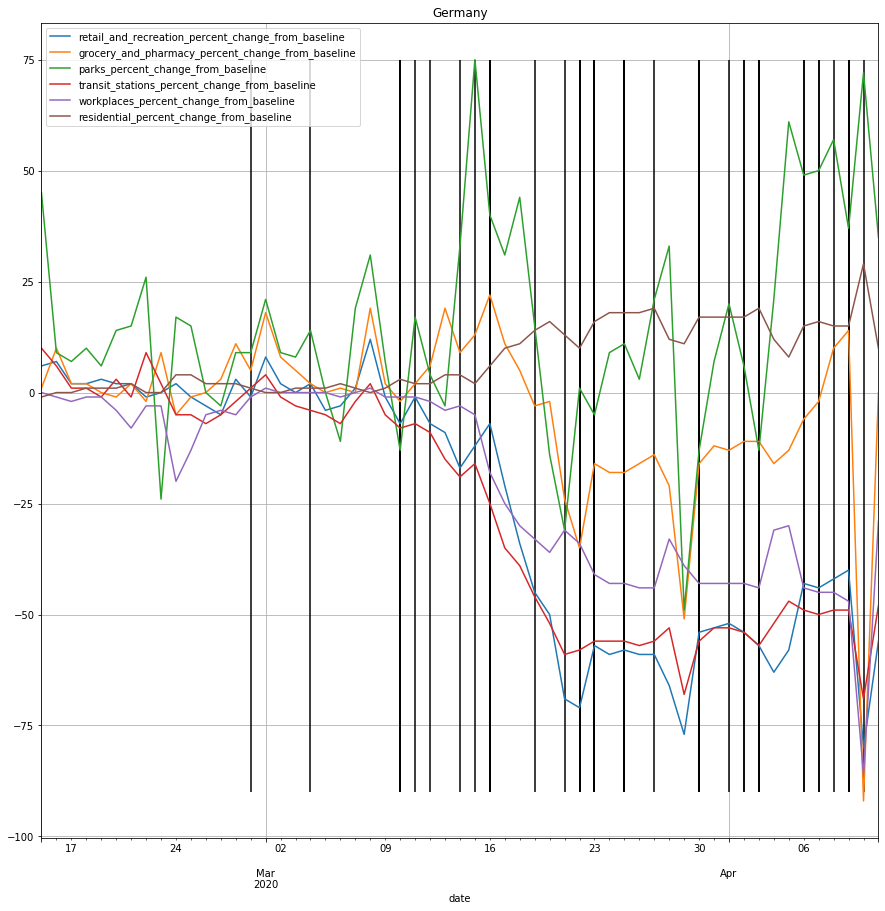

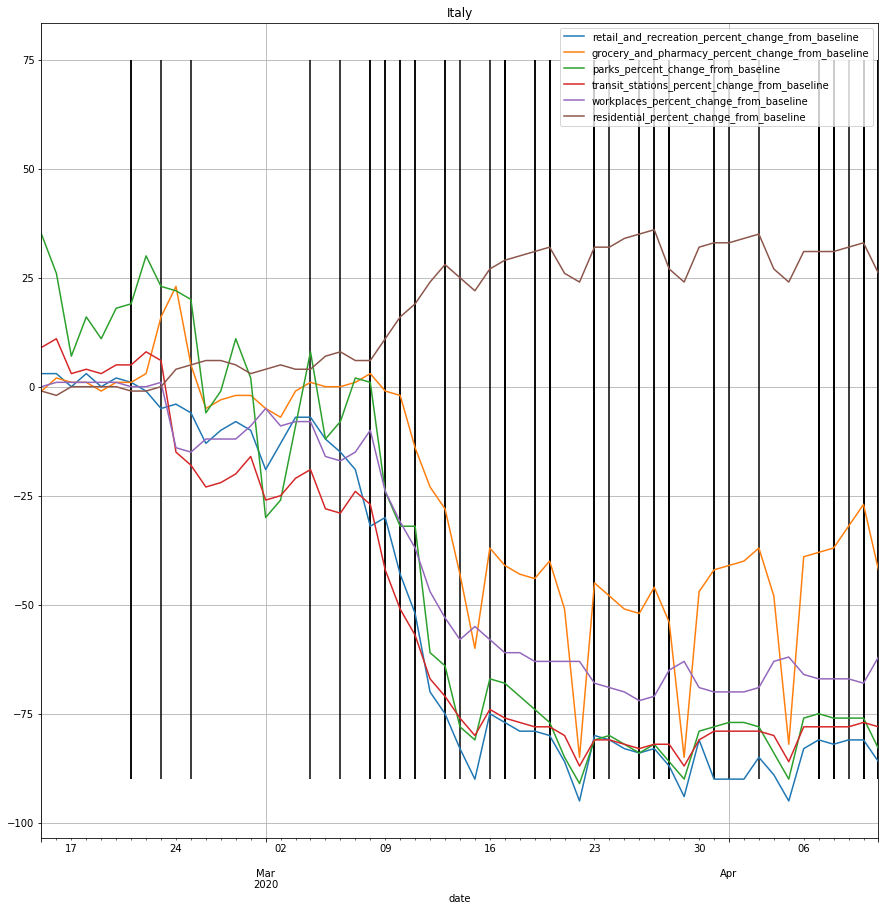

In [33]:
dpi_def = 60

sectors = ['retail_and_recreation_percent_change_from_baseline',
           'grocery_and_pharmacy_percent_change_from_baseline',   
           'parks_percent_change_from_baseline',   
           'transit_stations_percent_change_from_baseline',   
           'workplaces_percent_change_from_baseline',
           'residential_percent_change_from_baseline']

axes = mobility_nl.plot(x='date', y=sectors, kind='line', grid=True, sharex= True, sharey=True, figsize = (1000/dpi_def, 600/dpi_def), backend='matplotlib')
plt.title("Netherlands")
plt.vlines(x=measures_nl['DATE_IMPLEMENTED'].values, ymin=-70, ymax=70)
plt.rcParams['savefig.dpi'] = dpi_def
plt.savefig('mobility_nl.png', bbox='tight')

axes = mobility_de.plot(x='date', y=sectors, kind='line', grid=True, sharex= True, sharey=True, figsize = (15, 15), backend='matplotlib')
plt.title("Germany")
plt.vlines(x=measures_de['DATE_IMPLEMENTED'].values, ymin=-90, ymax=75)

axes = mobility_it.plot(x='date', y=sectors, kind='line', grid=True, sharex= True, sharey=True, figsize = (15, 15), backend='matplotlib')
plt.title("Italy")
plt.vlines(x=measures_it['DATE_IMPLEMENTED'].values, ymin=-90, ymax=75)


In [21]:
binary_var_length = []
for date in measures_nl['DATE_IMPLEMENTED']:
    length = mobility_nl.index[mobility_nl['date'] == date]
    if length.size != 0:
        binary_var_length.append(mobility_nl.index[mobility_nl['date'] == date][0])

In [22]:
from scipy import stats

for i in range(len(binary_var_length)):
    binary_var= [0 for j in range(binary_var_length[i])] + [1 for k in range(57-binary_var_length[i])]
    mobility_nl_work = mobility_nl['workplaces_percent_change_from_baseline']
    continuous_var = mobility_nl_work.values

    print(stats.pointbiserialr(binary_var, continuous_var))

PointbiserialrResult(correlation=-0.6193293117283578, pvalue=2.8066113920369764e-07)
PointbiserialrResult(correlation=-0.8260360233381547, pvalue=2.5908602615011226e-15)
PointbiserialrResult(correlation=-0.9270698136118202, pvalue=4.227329432345182e-25)
PointbiserialrResult(correlation=-0.9055943358557804, pvalue=3.8413046446968534e-22)
PointbiserialrResult(correlation=-0.9055943358557804, pvalue=3.8413046446968534e-22)
PointbiserialrResult(correlation=-0.9270698136118202, pvalue=4.227329432345182e-25)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361193539292892e-12)
PointbiserialrResult(correlation=-0.7741387207783336, pvalue=1.6361

In [23]:
# measures_nl.MEASURE.values
# measures_de.MEASURE.values
measures_it.MEASURE.values


array(['Public services closure\xa0', 'State of emergency declared',
       'International flights suspension', 'Partial lockdown',
       'Schools closure\xa0', 'Economic measures',
       'Strengthening the public health system',
       'Changes in prison-related policies',
       'Strengthening the public health system', 'Economic measures',
       'Partial lockdown', 'Checkpoints within the country',
       'Military deployment', 'Isolation and quarantine policies',
       'Full lockdown', 'Partial lockdown', 'Military deployment',
       'Public services closure\xa0',
       'Strengthening the public health system',
       'Public services closure\xa0', 'Limit public gatherings',
       'Limit public gatherings', 'Checkpoints within the country',
       'Limit product imports/exports',
       'Isolation and quarantine policies',
       'Emergency administrative structures activated or established',
       'Partial lockdown',
       'Emergency administrative structures activated or

In [24]:
from scipy import stats

binary_var_length = []
for date in measures_it['DATE_IMPLEMENTED']:
    length = mobility_it.index[mobility_nl['date'] == date]
    if length.size != 0:
        binary_var_length.append(mobility_it.index[mobility_it['date'] == date][0])
        
for i in range(len(binary_var_length)):
    binary_var= [0 for j in range(binary_var_length[i])] + [1 for k in range(57-binary_var_length[i])]
    mobility_it_work = mobility_it['workplaces_percent_change_from_baseline']
    continuous_var = mobility_it_work.values

    print(stats.pointbiserialr(binary_var, continuous_var))

PointbiserialrResult(correlation=-0.9610579218917094, pvalue=2.1204101961272026e-32)
PointbiserialrResult(correlation=-0.9124061679770263, pvalue=5.364779371611279e-23)
PointbiserialrResult(correlation=-0.48495682411509006, pvalue=0.0001317849533184906)
PointbiserialrResult(correlation=-0.8680332502758704, pvalue=2.3154740874457726e-18)
PointbiserialrResult(correlation=-0.8680332502758704, pvalue=2.3154740874457726e-18)
PointbiserialrResult(correlation=-0.8680332502758704, pvalue=2.3154740874457726e-18)
PointbiserialrResult(correlation=-0.8680332502758704, pvalue=2.3154740874457726e-18)
PointbiserialrResult(correlation=-0.8680332502758704, pvalue=2.3154740874457726e-18)
PointbiserialrResult(correlation=-0.796812654806577, pvalue=1.2306475120821484e-13)
PointbiserialrResult(correlation=-0.727131287971186, pvalue=1.5024278815361049e-10)
PointbiserialrResult(correlation=-0.796812654806577, pvalue=1.2306475120821484e-13)
PointbiserialrResult(correlation=-0.727131287971186, pvalue=1.5024278

In [25]:
# mobility_it

In [26]:
stock_it['Date'] = pd.to_datetime(stock_it['Date'])
stock_it.sort_values(by='Date',ascending=True, inplace=True)
stock_it.head()

,Date,Price,Open,High,Low,Vol.,Change
38,2020-02-17,25120.54,24961.76,25120.54,24903.00,315.46M,1.02
37,2020-02-18,25223.51,24985.71,25389.46,24969.75,737.04M,0.41
36,2020-02-19,25477.55,25352.69,25483.05,25271.72,464.70M,1.01
35,2020-02-20,25080.16,25414.77,25419.96,25080.16,445.15M,-1.56
34,2020-02-21,24773.15,24979.32,25129.98,24670.24,638.71M,-1.22


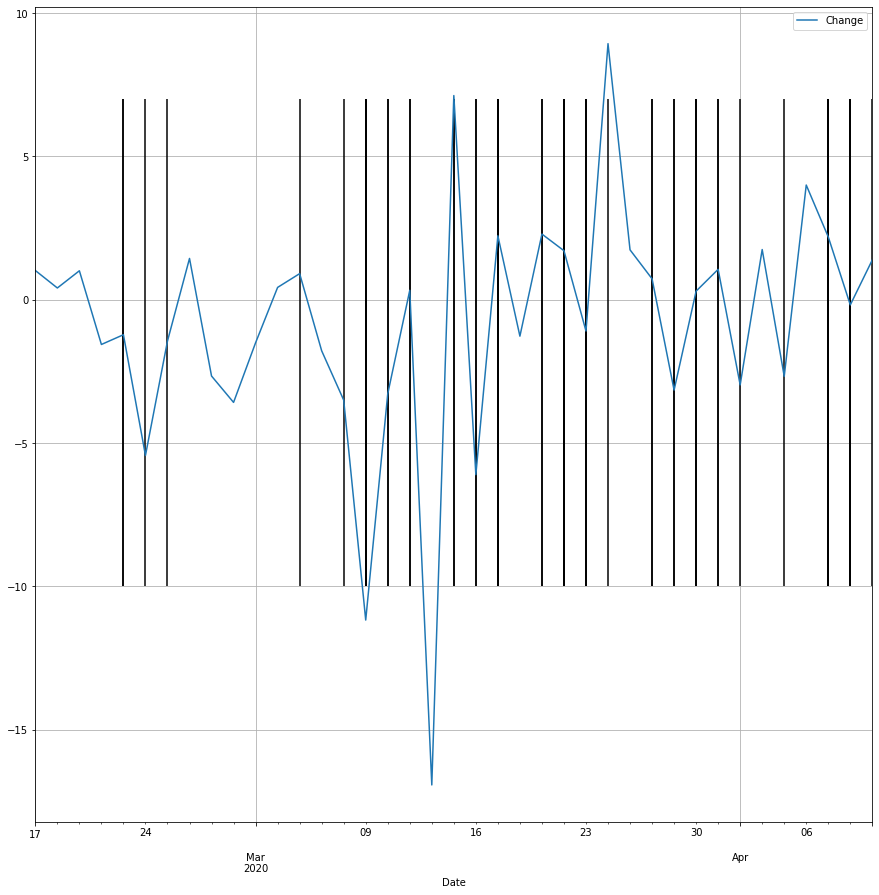

In [27]:
axes = stock_it.plot(x='Date', y="Change", kind='line', grid=True, sharex= True, sharey=True, figsize = (15, 15), backend='matplotlib')
plt.vlines(x=measures_it['DATE_IMPLEMENTED'].values, ymin=-10, ymax=7)